Importaciones:

In [4]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen
original = cv2.imread('img/aurora.png')
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

In [5]:
# Mostrar imagenes de cv2 con plt
def display(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

### Imagen original:

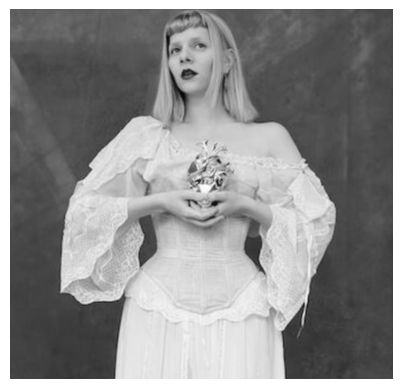

In [6]:
display(original)

# Segmentación binaria

In [7]:
# Umbral fijo
ret, umbral_fijo = cv2.threshold(original, 127, 255, cv2.THRESH_BINARY)

# Umbral adaptativo
umbral_adaptativo = cv2.adaptiveThreshold(original, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

Segmentación umbral fijo:


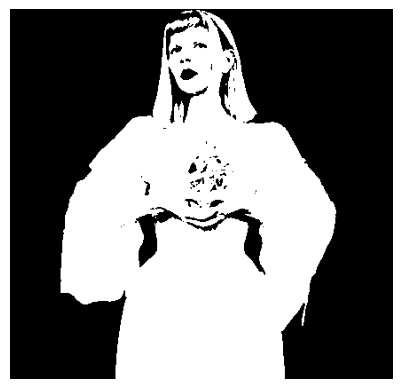

Segmentación umbral adaptativo:


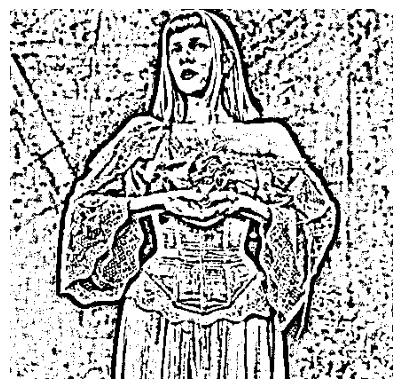

In [8]:
print("Segmentación umbral fijo:")
display(umbral_fijo)

print("Segmentación umbral adaptativo:")
display(umbral_adaptativo)

## Detección de contornos

In [9]:
ret, umbral = cv2.threshold(original, 127, 255, cv2.THRESH_BINARY)
contornos, jerarquia = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


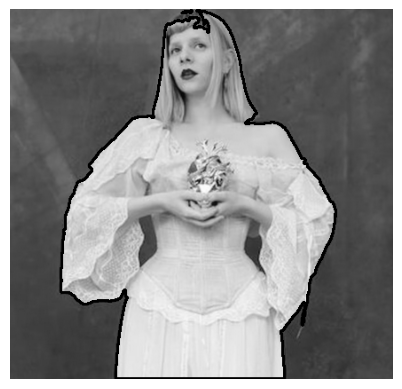

In [10]:
imagen_con_contornos = original.copy()
cv2.drawContours(imagen_con_contornos, contornos, -1, (0, 255, 0), 2)
display(imagen_con_contornos)

## Centro de masa y bounding boxes

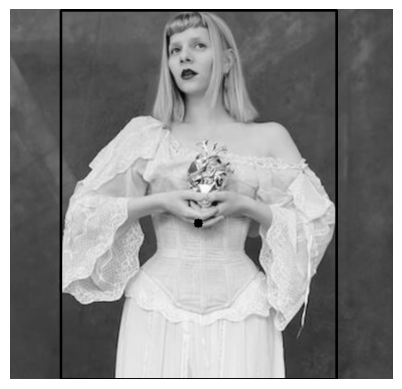

In [11]:
import cv2
import matplotlib.pyplot as plt

imagen_con_contornos = original.copy()

for contorno in contornos:
    if cv2.contourArea(contorno) > 100:  # Filtro para ignorar contornos muy pequeños
        M = cv2.moments(contorno)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            cv2.circle(imagen_con_contornos, (cx, cy), 5, (0, 0, 255), -1)

        x, y, w, h = cv2.boundingRect(contorno)
        cv2.rectangle(imagen_con_contornos, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(imagen_con_contornos)


## Métricas básicas

In [12]:
ret, umbral = cv2.threshold(original, 127, 255, cv2.THRESH_BINARY)
contornos, jerarquia = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

numero_formas = len(contornos)
area_promedio = sum(cv2.contourArea(c) for c in contornos) / numero_formas if numero_formas > 0 else 0
perimetro_promedio = sum(cv2.arcLength(c, True) for c in contornos) / numero_formas if numero_formas > 0 else 0

print(f"Número de formas detectadas: {numero_formas}")
print(f"Área promedio: {area_promedio:.2f}")
print(f"Perímetro promedio: {perimetro_promedio:.2f}")


Número de formas detectadas: 2
Área promedio: 40550.00
Perímetro promedio: 765.09
